In [29]:
import numpy as np
from scipy.fftpack import fft, fft2, fftshift, ifft2, ifftshift
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
from scipy import ndimage

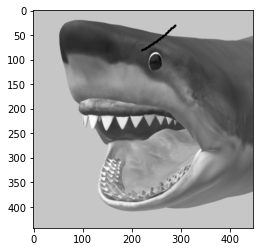

In [116]:
iname = "angry_shark.png"

img = cv2.imread(iname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img/255
fig, ax = plt.subplots()
ax.imshow(img, cmap='gray')

In [117]:
def convolution(img, kernel):
    res = np.zeros((img.shape[0]-1, img.shape[1]-1))
    for i in range(1,img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            res[i,j] = np.sum(img[i-1:i+2, j-1:j+2]*kernel)
    return res

### Gradient filter

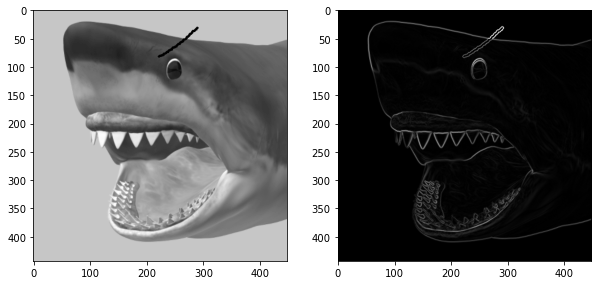

In [118]:
#local derivatives of image
kx = np.array([[-1, 0, 1]])
dx = ndimage.convolve(img, kx)
ky = np.array([[-1], [0], [1]])
dy = ndimage.convolve(img, ky)
#Intensity of derivative
I = np.sqrt(dx**2+dy**2)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(img, cmap="gray")
ax[1].imshow(I, cmap="gray")

cool filter with derivative angles

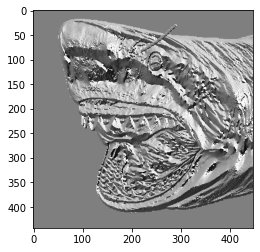

In [119]:
theta = np.arctan2(dy, dx)

fig, ax = plt.subplots()
ax.imshow(theta, cmap="gray")

### Haris detection

Compute autocorrelation matrix with gradients found earlier. This matrix is just hessian matrix. 

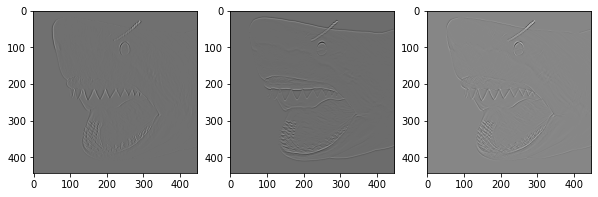

In [120]:
dxx = ndimage.convolve(dx, kx)
dyy = ndimage.convolve(dy, ky)
dxy = ndimage.convolve(dx, ky)

fig, ax = plt.subplots(1, 3, figsize=(10,5))
ax[0].imshow(dxx, cmap="gray")
ax[1].imshow(dyy, cmap="gray")
ax[2].imshow(dxy, cmap="gray")

In [153]:
#determinant
det = dxx*dyy - dxy**2
#trace
trace = dxx + dyy

#harris detection 
k = 0.15          #represents the boundary between edge and corners
harris = det - k*(trace**2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'edge detection')

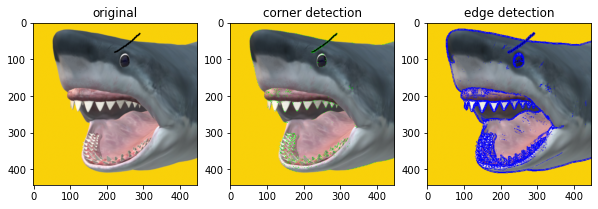

In [159]:
epsilon = 10**-3

c_img = cv2.imread(iname)
c_img = c_img/255
img_edge = c_img.copy()
img_corner = c_img.copy()
for i in range(c_img.shape[0]):
    for j in range(c_img.shape[1]):
        if harris[i][j] > epsilon:              #corner
            img_corner[i][j] = [0,255,0]
        if harris[i][j] < -epsilon:            #edge
            img_edge[i][j] = [255,0,0]
            
fig, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(c_img[:,:,::-1])
ax[0].set_title("original")
ax[1].imshow(img_corner[:,:,::-1])
ax[1].set_title("corner detection")
ax[2].imshow(img_edge[:,:,::-1])
ax[2].set_title("edge detection")

Not the best method if you're not working on very geometric shapes. You should note that the parameters have been fine-tuned to obtain these results.

### Sobel filter

Text(0.5, 1.0, 'sobel')

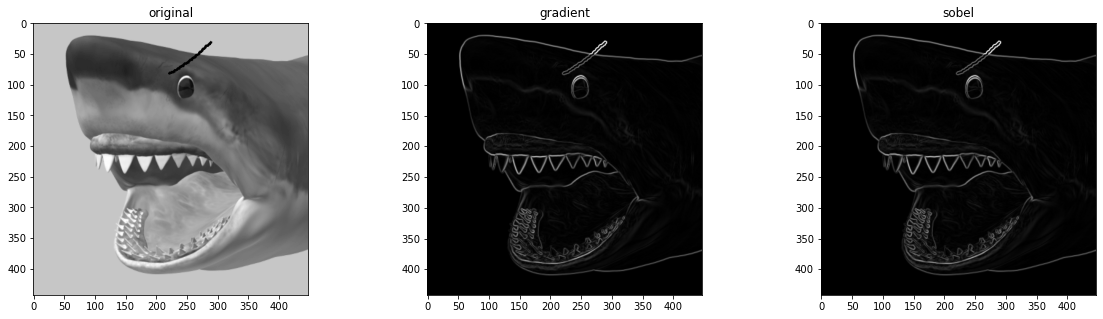

In [70]:
vert_sobel = np.array([[-1, -2, -1], [0,0,0], [1, 2, 1]])
hor_sobel = np.array([[-1, 0, 1], [-2,0,2], [-1, 0, 1]])
sx = convolution(img, hor_sobel)
sy = convolution(img, vert_sobel)
J = np.sqrt(sx**2 + sy**2)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("original")
ax[1].imshow(I, cmap="gray")
ax[1].set_title("gradient")
ax[2].imshow(J, cmap="gray")
ax[2].set_title("sobel")

### Average filter

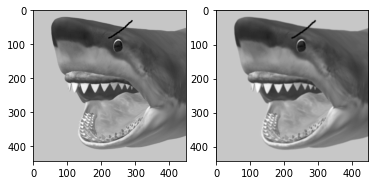

In [27]:
av_filter = np.ones(9)*1/9
av_filter.resize(3,3)
averaged = convolution(img, av_filter)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(averaged, cmap="gray")

### Gaussian filter

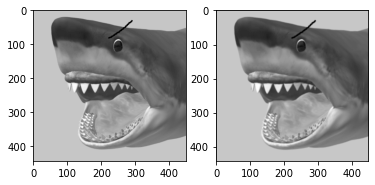

In [33]:
gauss_filter = np.array([[1,2,1], [2,4,2], [1,2,1]])/16
gaussianed = convolution(img, gauss_filter)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(gaussianed, cmap="gray")
